In [4]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

plt.rcParams["figure.figsize"] = 8, 8
cmap = ListedColormap(["k", "w"])

def show(A):
  plt.matshow(A, cmap=cmap)
  plt.axis("off")
  plt.show()

In [19]:
def check_intersect(rect1, rect2): # rect is 4-tuple (x1, x2, y1, y2)
  
  x_intersect = (rect1[0] <= rect2[0] and rect1[1] >= rect2[0]) or \
    (rect2[0] <= rect1[0] and rect2[1] >= rect1[0])
  
  y_intersect = (rect1[2] <= rect2[2] and rect1[3] >= rect2[2]) or \
    (rect2[2] <= rect1[2] and rect2[3] >= rect1[2])
  
  return x_intersect and y_intersect

def make_map(width, height):
  
  game_map = [[0 for x in range(width)] for y in range(height)]
  room_lst = []
  
  def make_rooms(width_interval, height_interval, attempt):
    for i in range(attempt):
      # Generate a new room
      room_width = random.randint(*width_interval)
      room_height = random.randint(*height_interval)
      x = random.randint(0, width - room_width)
      y = random.randint(0, height - room_height)
      new_room = (x, x + room_width - 1, y, y + room_height - 1)
      
      # Check if it intersects with other rooms
      for room in room_lst:
        if check_intersect(new_room, room):
          break
      else:
        room_lst.append(new_room)
          
      # Carve rooms
      for room in room_lst:
        for y in range(room[2] + 1, room[3]):
          for x in range(room[0] + 1, room[1]):
            game_map[y][x] = 1
            
  def connect_rooms():

    def manhattan_distance(room1, room2):
      center1 = ((room1[0] + room1[1]) // 2, (room1[2] + room1[3]) // 2)
      center2 = ((room2[0] + room2[1]) // 2, (room2[2] + room2[3]) // 2)

      return abs(center1[0] - center2[0]) + abs(center1[1] - center2[1])

    def connect_room(room1, room2):
      center1 = ((room1[0] + room1[1]) // 2, (room1[2] + room1[3]) // 2)
      center2 = ((room2[0] + room2[1]) // 2, (room2[2] + room2[3]) // 2)

      for i in range(min(center1[0], center2[0]), max(center1[0], center2[0]) + 1):
        game_map[center1[1]][i] = 1
      for i in range(min(center1[1], center2[1]), max(center1[1], center2[1]) + 1):
        game_map[i][center2[0]] = 1

    # Prim algorithm to connect all rooms
    D = [[manhattan_distance(room1, room2) for room2 in room_lst] for room1 in room_lst]

    Q = list(range(1, len(room_lst)))
    F = [0]

    edge_lst = []
    for i in Q:
      edge_lst.append((0, i))

    while Q:
      min_edge = None
      min_value = float("inf")
      for edge in edge_lst:
        source_index = edge[0]
        destination_index = edge[1]
        distance = D[source_index][destination_index]

        if distance < min_value:
          min_value = distance
          min_edge = edge

      connect_room(room_lst[min_edge[0]], room_lst[min_edge[1]])

      index = min_edge[1]
      for node in F:
        edge_lst.remove((node, index))

      F.append(index)
      Q.remove(index)
      for node in Q:
        edge_lst.append((index, node))
    
  make_rooms((8, 12), (8, 12), 100)
  connect_rooms()

  return game_map

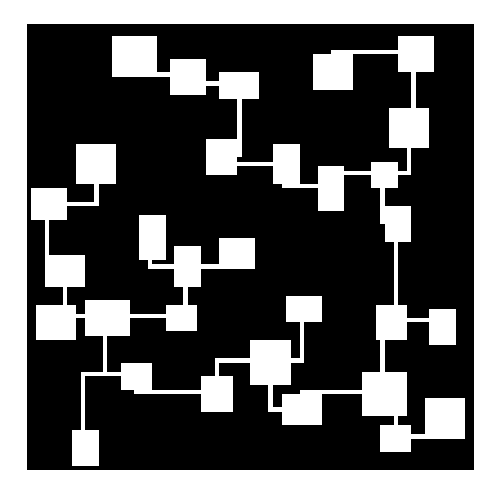

In [25]:
A = make_map(100, 100)
show(A)